In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

import seaborn as sns

582


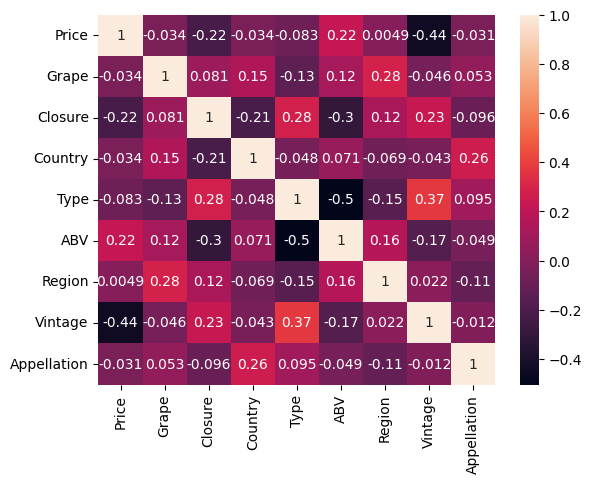

In [199]:
data = pd.read_csv('dataset/G2_Wine_Dataset.csv')

data = data.drop(columns=['Description', 'Title', 'Secondary Grape Varieties'])
data = data.dropna()
data = data.where(data['Capacity'] == '75CL').dropna().drop(columns=['Capacity'], axis=1)
data = data.where(data['Per bottle / case / each'] == 'per bottle').dropna().drop(columns=['Per bottle / case / each'], axis=1)
data['Vintage'] = data['Vintage'].where(data['Vintage'] != 'NV')
data['Vintage'] = data['Vintage'].str.extract(r'(\d+)')
data = data.dropna(subset=['Vintage'])
data['Price'] = data['Price'].str.extract(r'(\d+.\d+)').astype(float)
data['ABV'] = data['ABV'].str.extract(r'(\d+.\d+)').astype(float)
data = data.drop(columns=['Unit'])

# Split wine caracteristics into separate columns

data['Characteristics'] = data['Characteristics'].str.split(', ')
characteristics_expanded = data['Characteristics'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
characteristics_expanded.columns = [f'Char_{col}' for col in characteristics_expanded.columns]

data.drop(columns=['Characteristics'], inplace=True)

# Split wine styles into separate columns

data['Style'] = data['Style'].str.split(' & ')
style_expanded = data['Style'].apply(lambda x: pd.Series(1, index=x)).fillna(0)
style_expanded.columns = [f'Style_{col}' for col in style_expanded.columns]

data.drop(columns=['Style'], inplace=True)

# Normalize the columns containing string values to integers to enhance the model performance

data['Country'] = data['Country'].astype('category').cat.codes
data['Grape'] = data['Grape'].astype('category').cat.codes
data['Closure'] = data['Closure'].astype('category').cat.codes
data['Type'] = data['Type'].astype('category').cat.codes
data['Appellation'] = data['Appellation'].astype('category').cat.codes
data['Region'] = data['Region'].astype('category').cat.codes

# Draw seaborn correlation matrix to see the correlation between the features
sns.heatmap(data.corr(), annot=True)

data = data.join(characteristics_expanded)
data = data.join(style_expanded)

data.head()

print(len(data.index))

In [200]:
import random

X, y = data.drop(columns=['Type']), data['Type']

train_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=train_state)

### Algorithme Random Forest

In [201]:
clf = RandomForestClassifier(n_estimators=100, random_state=train_state)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.9914529914529915


### Algorithme Decision Tree Classifier

In [202]:
clf = DecisionTreeClassifier(random_state=train_state)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0


### Algorithme K-Neighbours Classifier

In [203]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7008547008547008


### Algorithme Support Vector Machine

In [204]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6068376068376068


### Algorithme Naives Bayes Gaussien

In [205]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 1.0
